### Lab 4 Anomaly Detection 2

In this lab, you will continue working with detecting anomalies in high dimensional data. You will use basic Python libraries and the PyOD (https://pyod.readthedocs.io/en/latest/) libaray for detecting anomalies. Save your notebook with your name.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns",100)
from sklearn.decomposition import PCA 

from pyod.utils.data import evaluate_print

import warnings
warnings.filterwarnings('ignore')


## Data overview

This dataset contains information on energy usage for different homes over a period of time. The data was collected by a wireless sensor installed in each of the homes. There are 30 features and 19735 data points.


In [2]:
energy_data= pd.read_csv('energy_usage.csv')
energy_data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Usage_level
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,0
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,0
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,0
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,0
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,0
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,0
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,0
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,0


In [3]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

<div class='alert alert-block alert-warning' style="font-weight:bolder">
 
 ### Data Preparation

</div>

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 1

### 1a: Remove the 'date' feature from the dataset 
### 1b: Implement feature-wise normalization with min-max normalization on all the features except 'usage_level'
### 1c: Set your label as 'Usage_level and divide your dataset into training and testing sets    




</div>

In [4]:
#Please implement task 1a here
energy_data_wo_date = energy_data.drop("date", axis=1)


In [5]:
#Please implement task 1b here

data = energy_data_wo_date.drop('Usage_level', axis=1)

data = data / (data.max() - data.min()) + data.min()

data.head(10)


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,10.056075,0.428571,18.890317,28.333213,17.495687,21.722777,18.844234,30.857179,16.811712,29.604800,16.970389,30.644992,-5.860469,1.851938,17.011112,24.676123,17.972825,31.275805,16.662459,31.051187,-4.787781,746.358140,25.210526,0.500000,1.969231,-6.360181,0.270877,0.270877
1,10.056075,0.428571,18.890317,28.308353,17.495687,21.720879,18.844234,30.859983,16.811712,29.622975,16.970389,30.644992,-5.866096,1.849983,17.011112,24.673759,17.972825,31.274549,16.665928,31.052428,-4.791533,746.360465,25.210526,0.476190,1.910256,-6.364706,0.377511,0.377511
2,10.046729,0.428571,18.890317,28.297528,17.495687,21.718184,18.844234,30.866682,16.805105,29.618600,16.970389,30.643338,-5.874053,1.840816,17.011112,24.669267,17.972825,31.269979,16.658991,31.049945,-4.795284,746.362791,25.210526,0.452381,1.851282,-6.369231,0.578276,0.578276
3,10.046729,0.571429,18.890317,28.291107,17.495687,21.717153,18.844234,30.869798,16.801802,29.611487,16.970389,30.643338,-5.877740,1.843512,17.004829,24.664184,17.963670,31.265182,16.658991,31.045806,-4.799035,746.365116,25.210526,0.428571,1.792308,-6.373756,0.913689,0.913689
4,10.056075,0.571429,18.890317,28.298446,17.495687,21.715466,18.844234,30.869798,16.801802,29.603235,16.973574,30.643338,-5.879680,1.858375,17.011112,24.662057,17.963670,31.265182,16.658991,31.045806,-4.802787,746.367442,25.210526,0.404762,1.733333,-6.378281,0.207039,0.207039
5,10.046729,0.571429,18.890317,28.290006,17.495687,21.714622,18.844234,30.866682,16.801802,29.611771,16.967203,30.642436,-5.881621,1.867206,17.004829,24.663121,17.963670,31.265182,16.658991,31.041253,-4.806538,746.369767,25.210526,0.380952,1.674359,-6.382805,0.903869,0.903869
6,10.056075,0.714286,18.890317,28.282851,17.495687,21.714622,18.844234,30.865124,16.801802,29.614332,16.964018,30.641484,-5.882688,1.870475,17.004829,24.660993,17.963670,31.265182,16.658991,31.041253,-4.810289,746.372093,25.210526,0.357143,1.615385,-6.387330,0.950163,0.950163
7,10.056075,0.714286,18.886797,28.277163,17.495687,21.714622,18.839249,30.865124,16.801802,29.617462,16.964018,30.640481,-5.884822,1.873846,17.001687,24.660993,17.963670,31.265182,16.658991,31.041253,-4.809753,746.373643,25.208333,0.369048,1.615385,-6.388084,0.666236,0.666236
8,10.056075,0.571429,18.879757,28.278195,17.495687,21.712748,18.839249,30.859983,16.801802,29.614332,16.970389,30.641985,-5.886763,1.881968,17.007970,24.668085,17.963670,31.265182,16.658991,31.041253,-4.809218,746.375194,25.206140,0.380952,1.615385,-6.388839,0.634546,0.634546
9,10.065421,0.571429,18.886797,28.291749,17.497868,21.711810,18.844234,30.863411,16.801802,29.627421,16.964018,30.641985,-5.884822,1.886013,17.011112,24.671631,17.963670,31.265182,16.658991,31.041253,-4.808682,746.376744,25.203947,0.392857,1.615385,-6.389593,0.067119,0.067119


In [6]:
#Please implement task 1b here

max = energy_data.max()
min = energy_data.min()
max['Usage_level'] = 1
min['Usage_level'] = 0
diff = max - min
energy_data = (energy_data-min) / diff
energy_data['Usage_level'] = energy_data['Usage_level'].astype('int')

# Oversampling
from imblearn.over_sampling import SMOTE

re_data,re_label = SMOTE(sampling_strategy=0.05, random_state=7).fit_resample(data,label)

class_diff = energy_data['Usage_level'].value_counts()
anomalies = energy_data[energy_data['Usage_level'] == 1]

target_class_diff = 10000
iterations = class_diff[0] - class_diff[1] - target_class_diff
print(iterations)
for i in range(iterations):
    energy_data = energy_data.append(anomalies.sample())

# Shuffle
print("Shuffle")
energy_data = energy_data.sample(frac = 1)
print(energy_data['Usage_level'].value_counts())


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [8]:
## Please implement task 1c here

from imblearn.over_sampling import RandomOverSampler

labels = energy_data['Usage_level']

oversampler = RandomOverSampler(sampling_strategy=0.1, random_state=42069)
data_sampeld, labels_sampeld = oversampler.fit_resample(data, labels)

data_sampeld = data_sampeld.sample(frac=1, random_state=77)
labels_sampeld = labels_sampeld.sample(frac=1, random_state=77)

split = int(0.7 * data_sampeld.shape[0])
train_data = data_sampeld[:split]
test_data = data_sampeld[split:]
train_labels = labels_sampeld[:split]
test_labels = labels_sampeld[split:]

test_data = test_data.reset_index(drop=True)
test_labels = test_labels.reset_index(drop=True)

train_labels.value_counts()


0    13819
1     1357
Name: Usage_level, dtype: int64

<div class='alert alert-block alert-warning' style="font-weight:bolder">
 
 ### Principal Component Analysis

</div>

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 2

### 2a: Determine the optimal number of principal components to keep for your data. A skeleton of the code is provided for you. 
    
### 2b: Implement PCA as an anomaly detection technique with the optimal number of principal components from task 2a. 
    
### 2c: Calculate, precision, recall and plot the precision-recall curve, calulate AUC. Give a comment on what you see in the curve wrt. Area Under the Curve (AUC)

Note: use the normalized data from Task 1

</div>

Amount of principal components to keep 95% cumulative explained variance: 18


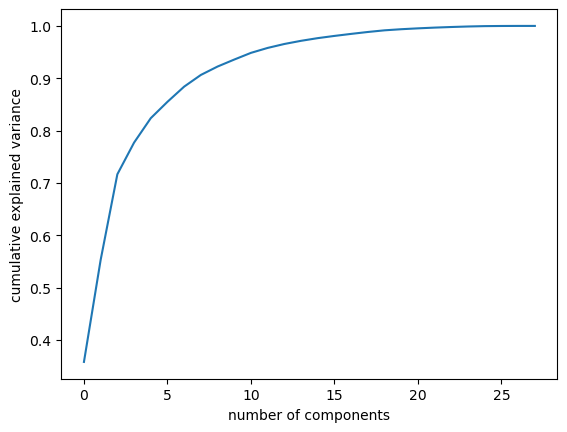

In [9]:
#Please implement task 2a here
pca = PCA()
X_pca = pca.fit(train_data)
variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(variance)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

np.cumsum(pca.explained_variance_ratio_)

for i in range(len(variance)):
    if variance[i] >= 0.99:
        print("Amount of principal components to keep 95% cumulative explained variance:", i)
        break

In [10]:
#Please implement task 2b here

from pyod.models.pca import PCA
from sklearn.metrics import precision_recall_curve, auc

clf = PCA(n_components=18, contamination=0.1)
clf.fit(train_data)

pred = clf.predict_proba(test_data)



auc 0.958018622144708


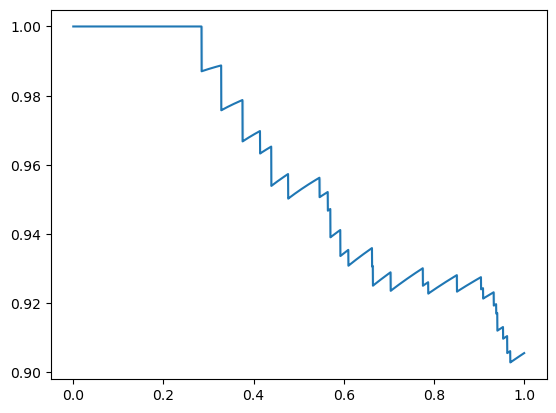

In [11]:
#Please implement task 2c here

pca_precision, pca_recall, pca_thresholds = precision_recall_curve(test_labels, pred[:, 0], pos_label=0)
sns.lineplot(x=pca_recall,y=pca_precision)

pca_score = auc(x=pca_recall,y=pca_precision)
print("auc", pca_score)


<div class='alert alert-block alert-warning' style="font-weight:bolder">
 
 ### Autoencoder

</div>

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 3

### 3a: Implement an autoencoder from the PyOD library on the dataset. 
### 3b: Calculate, precision, recall and plot the precision-recall curve, calulate AUC. Give a comment on what you see in the curve wrt. Area Under the Curve (AUC)


</div>

In [12]:
# Implement Task 3a here

from pyod.models.auto_encoder import AutoEncoder

clf = AutoEncoder(hidden_neurons=[28, 32, 32, 28], epochs=20, contamination=0.1)
clf.fit(train_data)

pred = clf.predict_proba(test_data)


2023-09-29 08:44:02.024519: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-29 08:44:04.146017: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28)                812       
                                                                 
 dropout (Dropout)           (None, 28)                0         
                                                                 
 dense_1 (Dense)             (None, 28)                812       
                                                                 
 dropout_1 (Dropout)         (None, 28)                0         
                                                                 
 dense_2 (Dense)             (None, 28)                812       
                                                                 
 dropout_2 (Dropout)         (None, 28)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                9

auc 0.9570581853745501


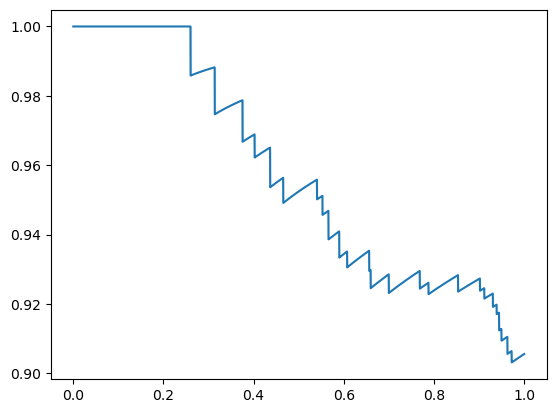

In [13]:
# Implement Task 3b here

autoencoder_precision, autoencoder_recall, autoencoder_thresholds = precision_recall_curve(test_labels, pred[:, 0], pos_label=0)
sns.lineplot(x=autoencoder_recall,y=autoencoder_precision)

autoencoder_score = auc(x=autoencoder_recall,y=autoencoder_precision)
print("auc", autoencoder_score)


<div class='alert alert-block alert-warning' style="font-weight:bolder">
 
 ### Angle-based Outlier Detection

</div>

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 4

### 4a:Implement ABOD from PyOD on the dataset. Remember to set the hyperparameters.
### 4b: Calculate, precision, recall and plot the precision-recall curve, calulate AUC. Give a comment on what you see in the curve wrt. Area Under the Curve (AUC)



</div>

In [16]:
# Implement Task 4a here

from pyod.models.abod import ABOD

clf = ABOD(contamination=0.05,n_neighbors=4)
clf.fit(train_data)

pred = clf.predict_proba(test_data)


In [17]:
# Implement Task 4b here

abod_precision, abod_recall, abod_thresholds = precision_recall_curve(test_labels, pred[:, 0], pos_label=0)
sns.lineplot(x=abod_recall,y=abod_precision)

abod_score = auc(x=abod_recall,y=abod_precision)
print("auc", abod_score)


ValueError: Input contains NaN.

<div class='alert alert-block alert-warning' style="font-weight:bolder">
 
 ### Isolation Forests

</div>

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 5

### 5a:Implement an Isolation Forest from PyOD on the dataset. Remember to set the hyperparameters.
    
### 5b:Calculate, precision, recall and plot the precision-recall curve, calulate AUC. Give a comment on what you see in the curve wrt. Area Under the Curve (AUC)



</div>

In [ ]:
# Implement Task 5a here

In [ ]:
# Implement Task 5b here

<div class='alert alert-block alert-warning' style="font-weight:bolder">
 
 ### Feature Bagging
    

</div>

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 6

### 6a:Implement Feature Bagging from PyOD on the dataset. Remember to set the hyperparameters.
    
### 6b:Calculate, precision, recall and plot the precision-recall curve, calulate AUC. Give a comment on what you see in the curve wrt. Area Under the Curve (AUC)



</div>

In [ ]:
# Implement Task 6a here

In [ ]:
# Implement Task 6b 

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 7

### Compare the scores from the implemented methods. Which one performed better. Why do you think this is the case?


</div>

### Please write your answer here